In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\anupsv\AppData\Local\Temp\ipykernel_316\75377621.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [5]:
crime = pd.read_csv("F:\Assignments\Clustering\crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
crime.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
crime.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## EDA

In [7]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
null_count_col = crime.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (crime.isnull().sum() * 100 / len(crime)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    5
dtype: int64 

Null Percentage for Columns:

 0.0    5
dtype: int64


In [10]:
null_count_row = crime.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (crime.isnull().sum(axis=1) * 100 / len(crime)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    50
dtype: int64 

Null Percentage for Rows:

 0.0    50
dtype: int64


In [11]:
crime.duplicated().sum()

0

In [12]:
crime[crime.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


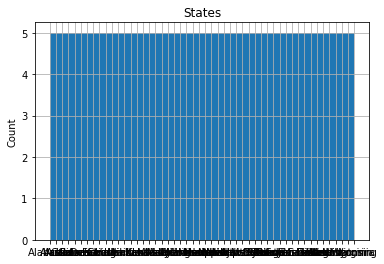

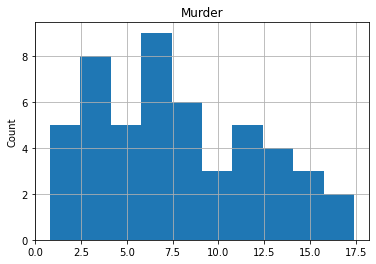

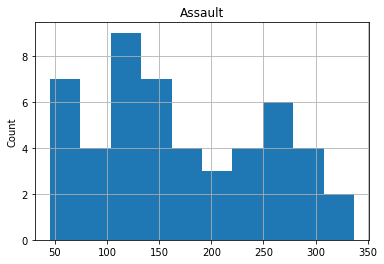

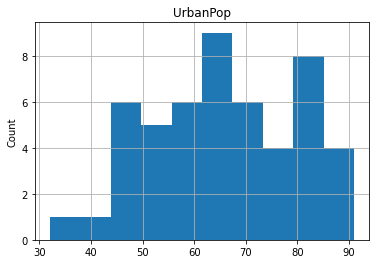

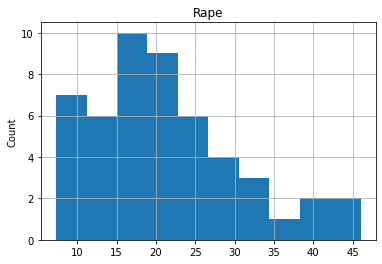

In [13]:
for feature in crime.columns:
    crime=crime.copy()
    crime[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

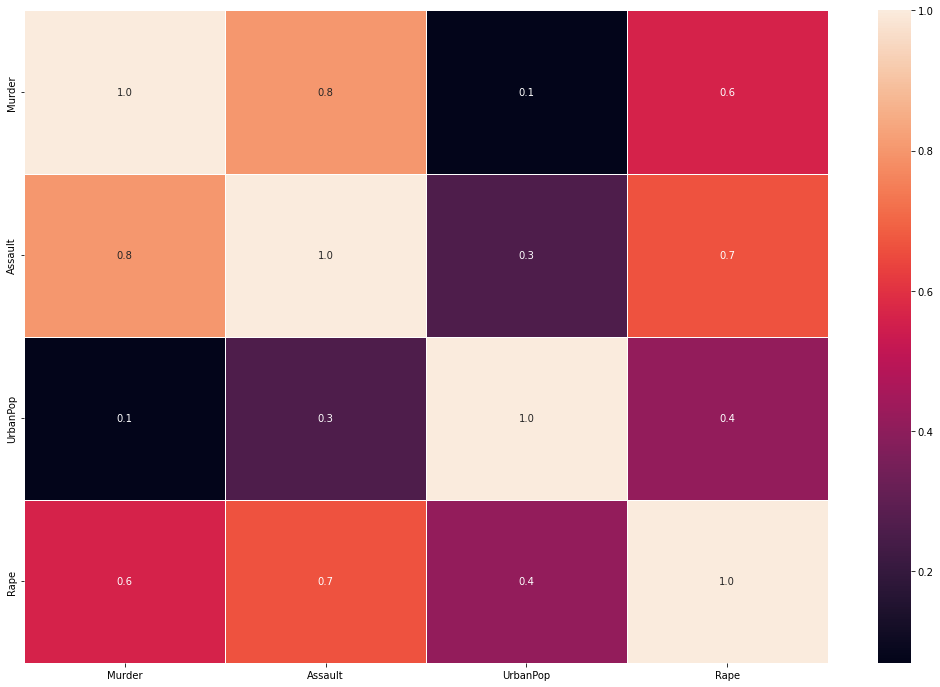

In [14]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(crime.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

## Murder Rate

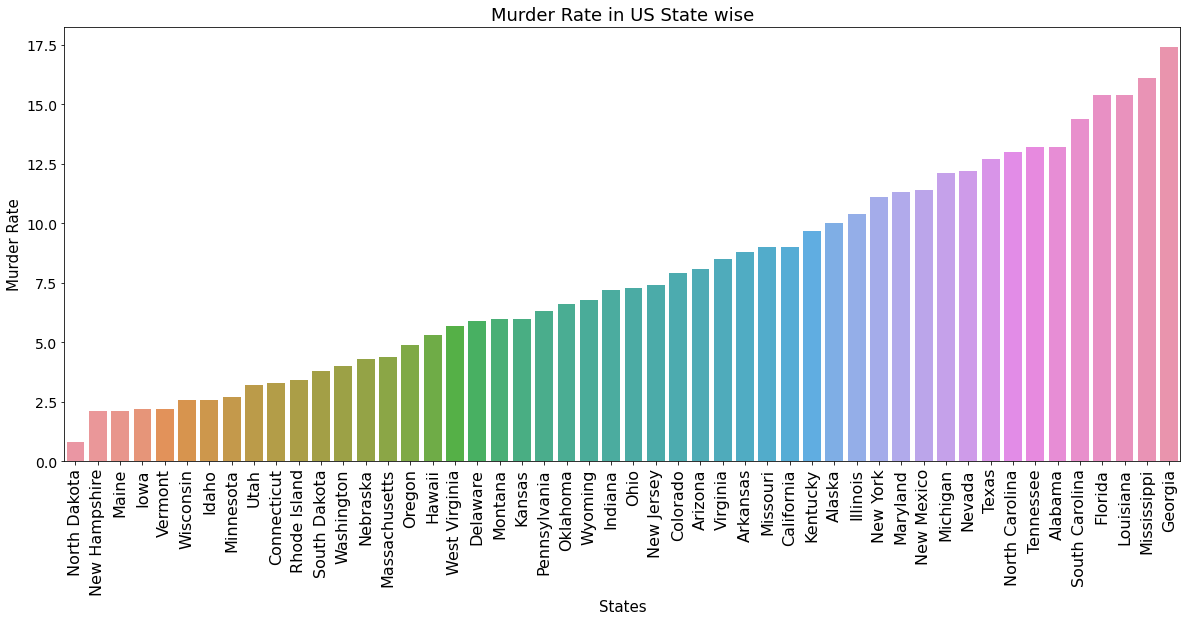

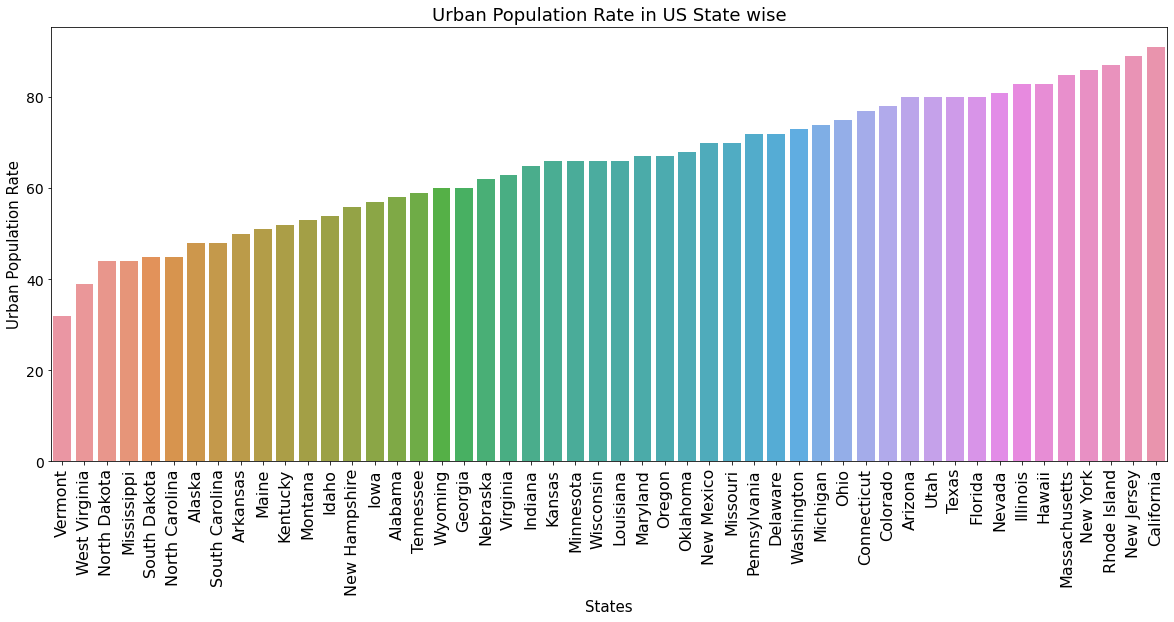

In [15]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Murder", 
            data=crime, 
            order=crime.sort_values('Murder').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="UrbanPop", 
            data=crime, 
            order=crime.sort_values('UrbanPop').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [16]:
print('Top 10 States with Highest Murder Rate')
crime.sort_values('Murder',ascending=False).head(10)

Top 10 States with Highest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
9,Georgia,17.4,211,60,25.8
23,Mississippi,16.1,259,44,17.1
8,Florida,15.4,335,80,31.9
17,Louisiana,15.4,249,66,22.2
39,South Carolina,14.4,279,48,22.5
0,Alabama,13.2,236,58,21.2
41,Tennessee,13.2,188,59,26.9
32,North Carolina,13.0,337,45,16.1
42,Texas,12.7,201,80,25.5
27,Nevada,12.2,252,81,46.0


In [17]:
print('Top 10 States with Lowest Murder Rate')
crime.sort_values('Murder',ascending=True).head(10)

Top 10 States with Lowest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
33,North Dakota,0.8,45,44,7.3
28,New Hampshire,2.1,57,56,9.5
18,Maine,2.1,83,51,7.8
14,Iowa,2.2,56,57,11.3
44,Vermont,2.2,48,32,11.2
48,Wisconsin,2.6,53,66,10.8
11,Idaho,2.6,120,54,14.2
22,Minnesota,2.7,72,66,14.9
43,Utah,3.2,120,80,22.9
6,Connecticut,3.3,110,77,11.1


In [18]:
murder = crime.sort_values('Murder', ascending = False, ignore_index=True)
murder.head()

,States,Murder,Assault,UrbanPop,Rape
0,Georgia,17.4,211,60,25.8
1,Mississippi,16.1,259,44,17.1
2,Florida,15.4,335,80,31.9
3,Louisiana,15.4,249,66,22.2
4,South Carolina,14.4,279,48,22.5


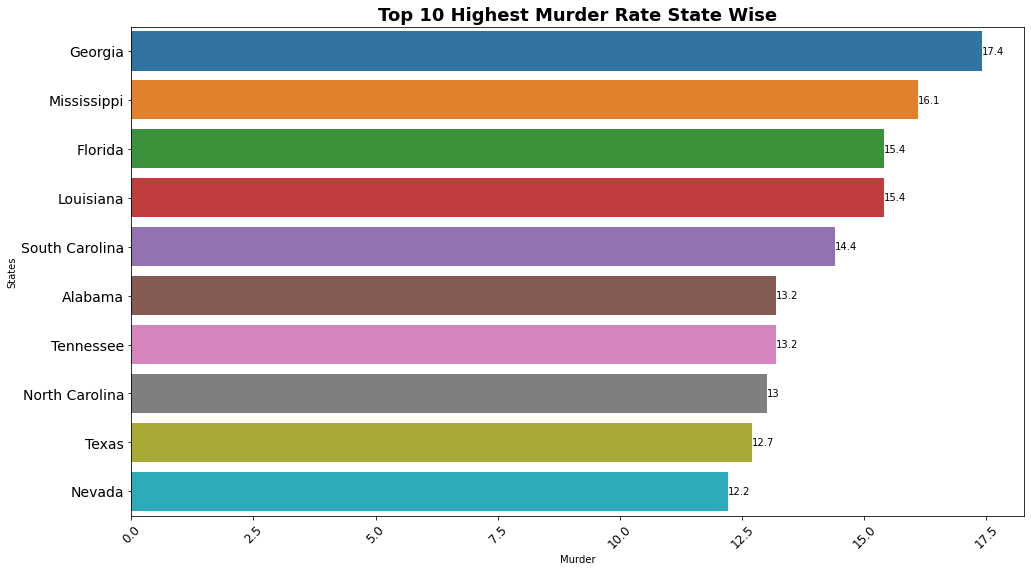

In [19]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = murder.Murder[:10], y = murder.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [21]:
murder = crime.sort_values('Murder', ascending = True,ignore_index=True)
murder.head()

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,New Hampshire,2.1,57,56,9.5
2,Maine,2.1,83,51,7.8
3,Iowa,2.2,56,57,11.3
4,Vermont,2.2,48,32,11.2


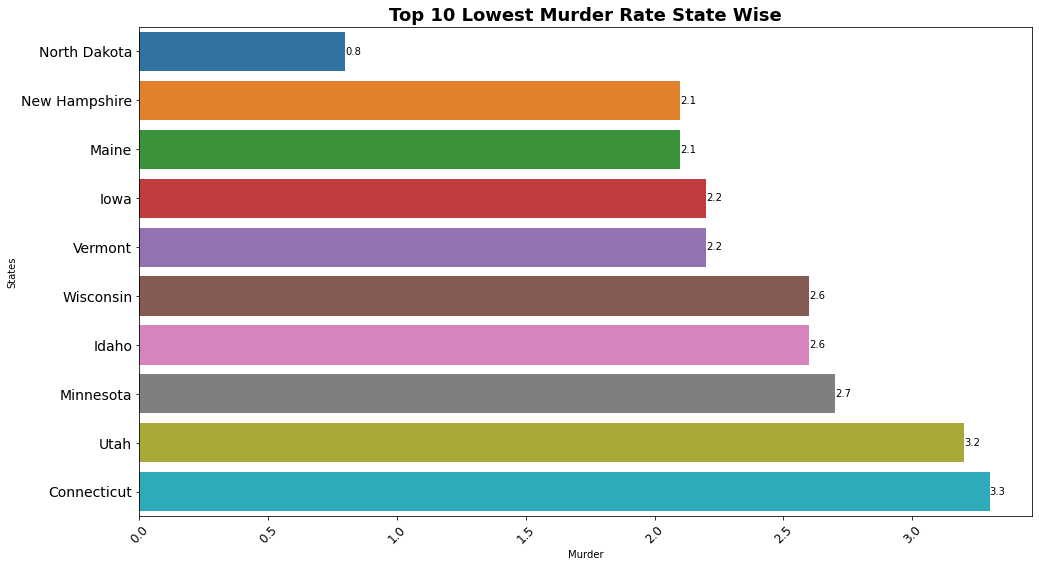

In [22]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = murder.Murder[:10], y = murder.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

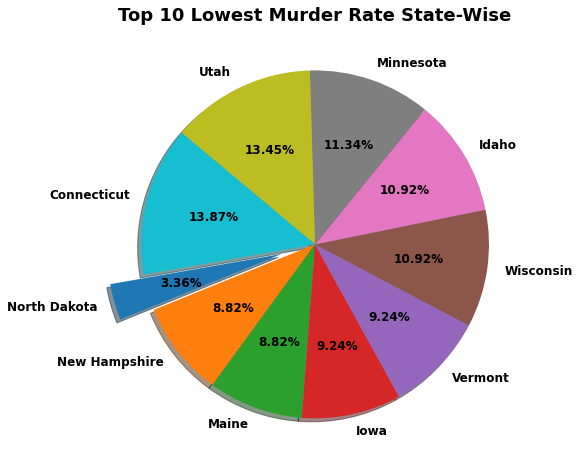

In [24]:
plt.figure(figsize = (8,8))
plt.pie(murder.Murder[:10],
       labels=murder.States[:10],
       explode = [0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Murder Rate State-Wise", fontsize = 18, fontweight = 'bold')
plt.show()

## Assault Rate

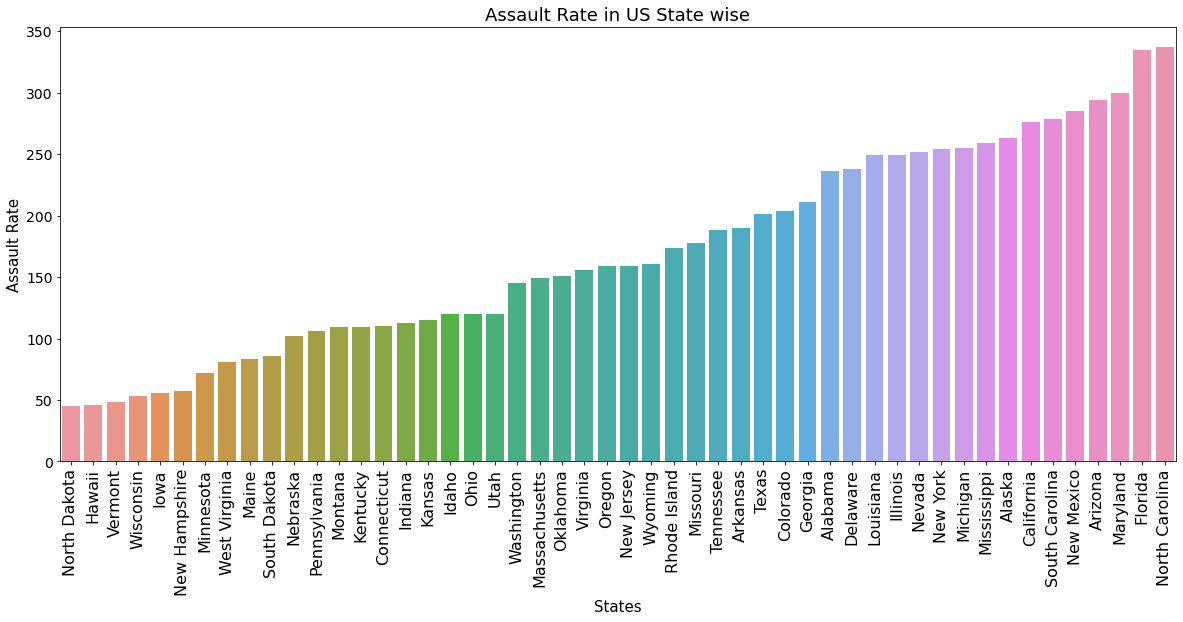

In [28]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Assault", 
            data=crime, 
            order=crime.sort_values('Assault').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Assault Rate in US State wise", size=18)
plt.show()

## Rape rate

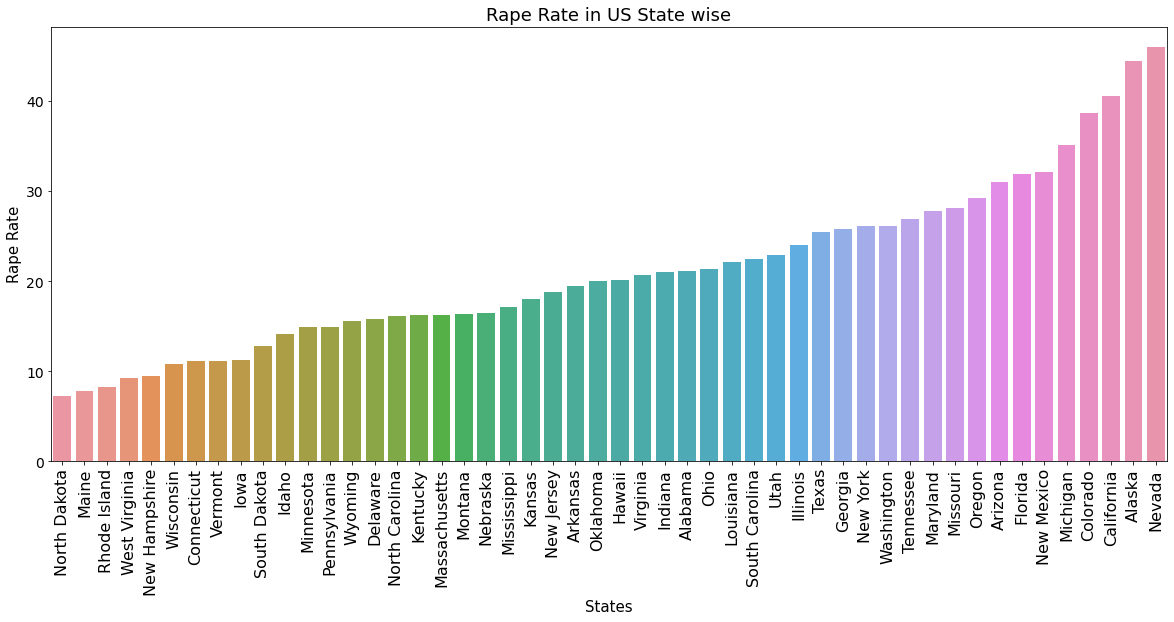

In [29]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Rape", 
            data=crime, 
            order=crime.sort_values('Rape').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Rape Rate in US State wise", size=18)
plt.show()

In [30]:
# Normalizing the data
crime_num =  crime.iloc[:,1:]
crime_norm = pd.DataFrame(normalize(crime_num),columns=crime_num.columns)
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


In [31]:
crime_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.040677,0.881704,0.409630,0.119341
std,0.015018,0.101645,0.166944,0.035642
min,0.012626,0.473419,0.132112,0.042620
25%,0.027485,0.850453,0.279234,0.092741
50%,0.039406,0.907323,0.395010,0.117441
75%,0.049811,0.952031,0.508929,0.139552
max,0.079346,0.989371,0.854213,0.207893


# Hierarchical clustering

In [32]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
from sklearn.cluster import AgglomerativeClustering

In [33]:
crime1 = crime.copy()
crime_norm1 = crime_norm.copy()

In [34]:
z = linkage(crime_norm1, method="complete",metric="euclidean")

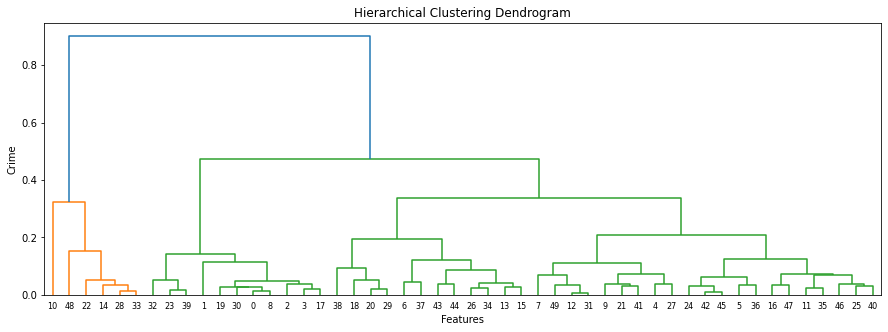

In [35]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [36]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [37]:
y=pd.DataFrame(hclusters.fit_predict(crime_norm1),columns=['Clusters'])
y['Clusters'].value_counts()

0    20
3    12
1    12
2    5 
4    1 
Name: Clusters, dtype: int64

In [38]:
# Adding clusters to a copy of dataset
crime1['Clusters']=hclusters.labels_
crime1

,States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [39]:
crime1.groupby('Clusters').agg(['mean']).reset_index()

C:\Users\anupsv\AppData\Local\Temp\ipykernel_316\3903742609.py:1: FutureWarning: ['States'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime1.groupby('Clusters').agg(['mean']).reset_index()


,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.760000,255.550000,66.100000,27.090000
1,1,4.758333,116.583333,70.083333,15.683333
2,2,2.080000,56.600000,57.800000,10.760000
3,3,6.783333,141.583333,61.833333,21.466667
4,4,5.300000,46.000000,83.000000,20.200000


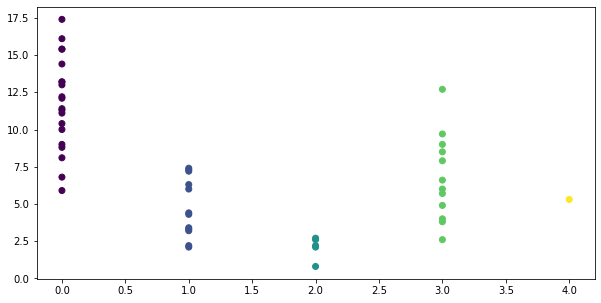

In [40]:
# Plot Clusters
plt.figure(figsize=(10, 5))  
plt.scatter(crime1['Clusters'],crime1['Murder'], c=hclusters.labels_)

## k-means Clustering

In [41]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 

In [42]:
crime2 = crime.copy()
crime_norm2 = crime_norm.copy()

In [43]:
crime2.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [45]:
#Elbow curve
k = list(range(2,15))

In [46]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(crime_norm2)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(crime_norm2.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,crime_norm2.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x20228293490>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

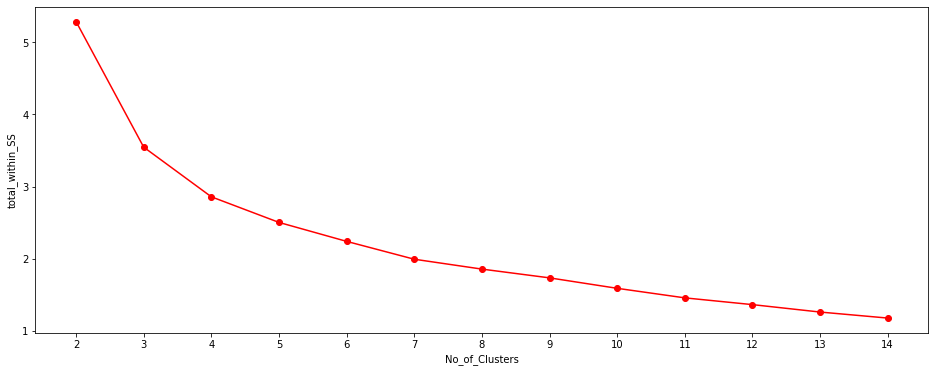

In [47]:
# Scree plot 
plt.figure(figsize=(16,6))
plt.plot(k,TWSS,'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [50]:
# The elbow appear to be smoothening out after four clusters indicating that the optimal number of clusters is 4.
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=4) 
model.fit(crime_norm2)

KMeans(n_clusters=4)

In [56]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(crime_norm2)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

G:\IDE\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,num_clusters,cluster_errors
0,1,1.945208
1,2,0.754096
2,3,0.327848
3,4,0.228183
4,5,0.163952
5,6,0.120599
6,7,0.101886
7,8,0.088071
8,9,0.077049
9,10,0.065955


In [57]:
model.cluster_centers_

array([[0.04531605, 0.95994345, 0.24802482, 0.10322567],
       [0.03689098, 0.84108145, 0.52207436, 0.12738443],
       [0.02971377, 0.65577288, 0.73186384, 0.14305726],
       [0.04205536, 0.90426714, 0.40250352, 0.12472689]])

In [59]:
X = crime2[['Murder', 'Assault', 'Rape', 'UrbanPop']]
clusters = KMeans(4)  # 4 clusters!
clusters.fit(X)
clusters.cluster_centers_
clusters.labels_
crime2['Crime_clusters'] = clusters.labels_
crime2.head()
crime2.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


In [60]:
stats =crime2.sort_values("Murder", ascending=True)
stats

,States,Murder,Assault,UrbanPop,Rape,Crime_clusters
33,North Dakota,0.8,45,44,7.3,1
28,New Hampshire,2.1,57,56,9.5,1
18,Maine,2.1,83,51,7.8,1
14,Iowa,2.2,56,57,11.3,1
44,Vermont,2.2,48,32,11.2,1
48,Wisconsin,2.6,53,66,10.8,1
11,Idaho,2.6,120,54,14.2,3
22,Minnesota,2.7,72,66,14.9,1
43,Utah,3.2,120,80,22.9,3
6,Connecticut,3.3,110,77,11.1,3


In [61]:

# Grouping data by Clusters (k=4)
crime2.groupby('Crime_clusters').agg(['mean']).reset_index()

C:\Users\anupsv\AppData\Local\Temp\ipykernel_316\2259099689.py:2: FutureWarning: ['States'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime2.groupby('Crime_clusters').agg(['mean']).reset_index()


,Crime_clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,8.214286,173.285714,70.642857,22.842857
1,1,2.950000,62.700000,53.900000,11.510000
2,2,11.812500,272.562500,68.312500,28.375000
3,3,5.590000,112.400000,65.600000,17.270000


G:\IDE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\IDE\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


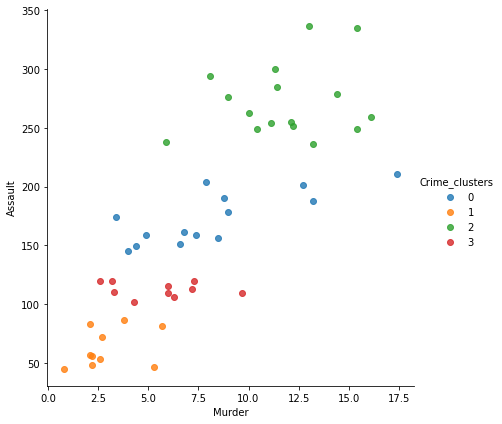

In [62]:

# Plot between pairs Murder~Assault
sns.lmplot( 'Murder','Assault',  data=crime2,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

G:\IDE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\IDE\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


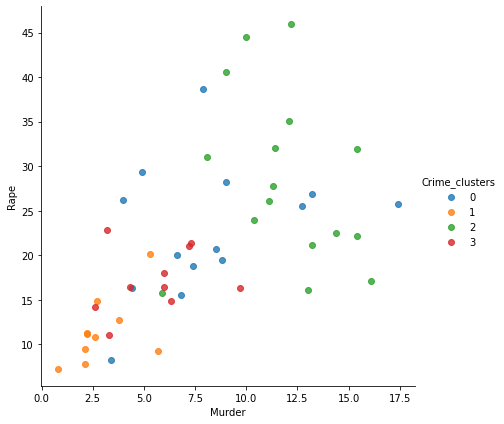

In [63]:

# Plot between pairs Murder~Rape
sns.lmplot( 'Murder','Rape',  data=crime2,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

G:\IDE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\IDE\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


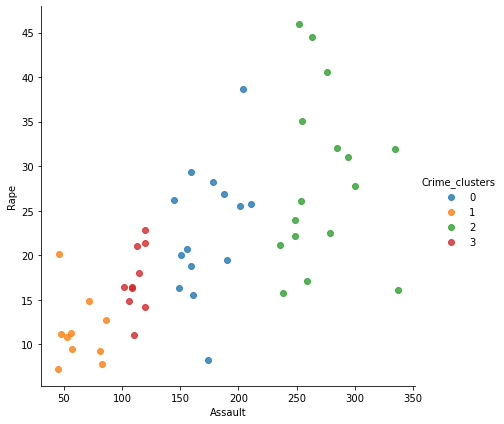

In [64]:
# Plot between pairs Assault~Rape
sns.lmplot( 'Assault','Rape',  data=crime2,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

## DB Scan

In [66]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [67]:
crime3 = crime.copy()
crime_norm3 = StandardScaler().fit_transform(crime_num)
crime_norm3

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [68]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm3)

DBSCAN(eps=1, min_samples=4)

In [69]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [70]:
# Making clusters column 
Clusters = pd.DataFrame(dbscan.labels_,columns=['clusters'])
Clusters

,clusters
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,-1


In [71]:
# Adding clusters the to dataset
crime3['Clusters']=dbscan.labels_
crime3

,States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [73]:
crime3.groupby('Clusters').agg(['mean']).reset_index()

C:\Users\anupsv\AppData\Local\Temp\ipykernel_316\3797078961.py:1: FutureWarning: ['States'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime3.groupby('Clusters').agg(['mean']).reset_index()


,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


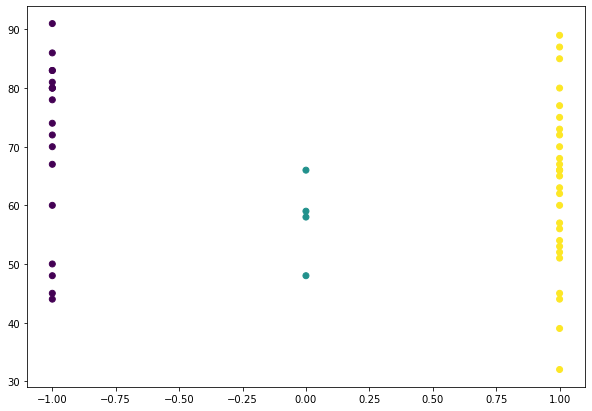

In [74]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime3['Clusters'],crime3['UrbanPop'], c=dbscan.labels_)

###### Cluster 3 - south western states (however, definition changes for different sources) maxes out in three (Assault, Urbanpop, Rape) out of four crimes.

Cluster 4 stands out for minimum crime rate as the means of 3 crimes are least relative to other crimes Coincidentally, most of the southern region states belong to cluster 2 where Murders seems to be popular.

The southern states in cluster 4 have more number of average arrests/ 100,000 persons in all the three crime categories than states (half of mid-western states) in cluster 2 in spite of the average Urbanpop (%) being very close. For causality, more variables are needed apart from the number of arrests to understand the inferences like the above. For instance, it could be the density of people or number of people with a different socio-economic statuses in that state.